<p><span style="font-size:.9em;">A Pytorch implementation of</span></p>
<p><span style="font-weight:bold;font-size:1.4em;">The Relativistic Discriminator: A Key Element Missing from Standard GAN  <a href='https://openreview.net/forum?id=S1erHoR5t7&noteId=S1erHoR5t7'><span style="font-size:0.9em;">Link to the Paper</span></a></span> </p>
<p><span style="font-size:1.2em;">Author: Alexia Jolicoeur-Martineau (Lady Davis Institute, Université de Montréal)</span> </p>
<p>Accepted at ICLR 2019</p>

<details><summary><span style="font-size:1.2em;">Paper Abstract</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>
<p>

In standard generative adversarial network (SGAN), the discriminator D estimates the probability that the input data is real. The generator G is trained to increase the probability that fake data is real. We argue that it should also simultaneously decrease the probability that real data is real because 1) this would account for a priori knowledge that half of the data in the mini-batch is fake, 2) this would be observed with divergence minimization, and 3) SGAN would be more similar to integral probability metric (IPM) GANs. <br> <br>
We show that this property can be induced by using a “relativistic discriminator” which estimate the probability that the given real data is more realistic than a randomly sampled fake data. We also present a variant in which the discriminator estimate the probability that the given real data is more realistic than fake data, on average. We generalize both approaches to non-standard GAN loss functions and we refer to them respectively as Relativistic GANs (RGANs) and Relativistic average GANs (RaGANs). We show that IPM-based GANs are a subset of RGANs which use the identity function. <br><br>
Empirically, we observe that 1) RGANs and RaGANs are significantly more stable and generate higher quality data samples than their non-relativistic counterparts, 2) Standard RaGAN with gradient penalty generate data of better quality than WGAN-GP while only requiring a single discriminator update per generator update (reducing the time taken for reaching the state-of-the-art by 400%), and 3) RaGANs are able to generate plausible high resolutions images (256x256) from a very small sample (N=2011), while GAN and LSGAN cannot; these images are of significantly better quality than the ones generated by WGAN-GP and SGAN with spectral normalization.

</p>
</details>

<span style="font-size:.9em;">The implementation is done by <br>A.Tarik Temur (Department of Computer Engineering, Middle East Technical University) and <br>M.Ekrem Odabas (Department of Computer Engineering, Middle East Technical University)</span>

In [1]:
from IPython.display import Markdown as md, display
import numpy as np
from jupyter_utils import interaction, interaction_cat, read_results, create_markdown_cifar, create_markdown_cat,create_markdown_unstable, reproduce_cat_samples

In [2]:
cifar10_dict, cat_dict, unstable_dict = read_results()

## Experiment 5.1 CIFAR-10 (Table 1) <br>
<details>
    <summary>
        <span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <br>
    Standard CNN architecture with spectral normalization (See Appendices, "I.1 Standard CNN" in the paper) is used.
    <br>
    <br>
    <table style='font-size:150%'>
        <tr>
            <th style="text-align: center; vertical-align: middle;">Generator</th>
            <th style="text-align: center; vertical-align: middle;">Discriminator</th>
        </tr>
        <tr>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 128 → 512*4*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, 512*4*4 → (512, 4, 4)</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 512 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 256 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 128 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 3x3 kernel, stride 1, padding 1, channels 64 → 3</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x32x32}$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 3 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 64 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 64 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 128 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 128 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 256 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 256 → 512</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, (512, 4, 4) → 512*4*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 512*4*4 → 1</span></td></tr>
                </table>
            </td>
        </tr> 
    </table>
    <br>
    The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
    The experiment involves training with two different settings of hyperparameters.<br>
    The hyperparameters of the first part are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and the number of discriminator updates before a generator update ($n_D$) = 1. <br>
    The second part has $lr$= .0001, Adam $\beta$ = (0.5,0.9) and $n_D$ = 5. <br>
    Hyperparameters are stated also in the first row of the table.
</details>


<br>
FIDs are calculated at exactly 100k generator training iterations on CIFAR10 dataset. <br>
<br>

<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td>$lr$<span style="font-weight:normal">= .0002</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.999)</span><br>$n_D$ <span style="font-weight:normal">= 1</span></td><td>$lr$<span style="font-weight:normal">= .0001</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.9)</span><br>$n_D$ <span style="font-weight:normal">= 5</span></td></tr>
        <tr><td>SGAN</td><td>40.64</td><td>41.32</td></tr>
        <tr><td>RSGAN</td><td>36.61</td><td>55.29</td></tr>
        <tr><td>RaSGAN</td><td>31.98</td><td>37.92</td></tr>
        <tr><td>LSGAN</td><td>29.53</td><td>187.01</td></tr>
        <tr><td>RaLSGAN</td><td>30.92</td><td>219.39</td></tr>
        <tr><td>HingeGAN</td><td>49.53</td><td>80.85</td></tr>
        <tr><td>RaHingeGAN</td><td>39.12</td><td>37.72</td></tr>
        <tr><td>WGAN-GP</td><td>83.89</td><td><span style="font-weight:bold">27.81</span></td></tr>
        <tr><td>RSGAN-GP</td><td><span style="font-weight:bold">25.60</span></td><td>28.13</td></tr>
        <tr><td>RaSGAN-GP</td><td>331.86</td><td></td></tr>
    </table>
</details>



<br>

In [3]:
md(create_markdown_cifar(cifar10_dict))

|<span style="font-weight:normal">Loss Type</span>|$lr$<span style="font-weight:normal">= .0002</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.999)</span><br>$n_D$ <span style="font-weight:normal">= 1</span>|$lr$<span style="font-weight:normal">= .0001</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.9)</span><br>$n_D$ <span style="font-weight:normal">= 5</span>|
|:-:|:-:|:-:|
|SGAN|18.802|27.526|
|RSGAN|20.624|32.034|
|RaSGAN|18.345|28.406|
|LSGAN|23.444|42.789|
|RaLSGAN|22.728|37.017|
|HingeGAN|17.329|25.369|
|RaHingeGAN|19.079|28.864|
|WGAN-GP|75.000|25.687|
|RSGAN-GP|18.323|**17.500**|
|RaSGAN-GP|**14.908**||


## Experiment 5.2 CAT (Table 2) (Only 64x64 part) <br>
<details><summary><span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>

<br>
DCGAN 64x64 architecture (See Appendices, "I.2. DCGAN 64x64" in the paper) is used.
<br>
<br>

<table style='font-size:150%'>
    <tr>
        <th><p style="text-align:center;">Generator</p></th>
        <th><p style="text-align:center;">Discriminator</p></th>  
    </tr>
    <tr>
        <td>   
            <table>
                <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 1, padding 0, no bias, channels 128 → 512</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 256</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 128</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 64</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 3</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
            </table>
        </td>
        <td>  
            <table>
                <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x64x64}$</span></th></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 3 → 64</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 128</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 256</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 512</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 1</span></td></tr>
            </table>
        </td>
    </tr>
</table>



<br>


<br>

The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
The hyperparameters of the experiment are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and number of discriminator updates before generator update ($n_D$) = 1. <br>
Hyperparameters are stated also in the first row of the table.  <br>

</details>

<br>
FIDs are calculated at 20k, 30k, ..., 100k generator training iterations on the CAT 64x64 dataset. Minimum and maximum values, means, and standard deviations of the calculated FIDs are compared.  <br>
<br>
<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td><span style="font-weight:normal">Minimum FID</span></td><td><span style="font-weight:normal">Maximum FID</span></td><td><span style="font-weight:normal">Mean of FIDs</span></td><td><span style="font-weight:normal">StDev of FIDs</span></td></tr>
        <tr><td>SGAN</td><td>16.56</td><td>310.56</td><td>52.54</td><td>96.81</td></tr>
        <tr><td>RSGAN</td><td>19.03</td><td>42.05</td><td>32.16</td><td>7.01</td></tr>
        <tr><td>RaSGAN</td><td>15.38</td><td>33.11</td><td>20.53</td><td>5.68</td></tr>
        <tr><td>LSGAN</td><td>20.27</td><td>224.97</td><td>73.62</td><td>61.02</td></tr>
        <tr><td>RaLSGAN</td><td><span style="font-weight:bold">11.97</span></td><td><span style="font-weight:bold">19.29</span></td><td><span style="font-weight:bold">15.61</span></td><td>2.55</td></tr>
        <tr><td>HingeGAN</td><td>17.60</td><td>50.94</td><td>32.23</td><td>14.44</td></tr>
        <tr><td>RaHingeGAN</td><td>14.62</td><td>27.31</td><td>20.29</td><td>3.96</td></tr>
        <tr><td>RSGAN-GP</td><td>16.41</td><td>22.34</td><td>18.20</td><td>1.82</td></tr>
        <tr><td>RaSGAN-GP</td><td>17.32</td><td>22</td><td>19.58</td><td><span style="font-weight:bold">1.81</span></td></tr>
    </table>
</details>


<br>

<!-- <br>
DCGAN 64x64 architecture (See Appendices, "I.2. DCGAN 64x64" in the paper) is used.
<br>
<br>

<table style='font-size:150%'>
<tr><th><p style="text-align:center;">Generator</p>  </th><th><p style="text-align:center;">Discriminator</p>  </th></tr>

<tr>
<td>
<table>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 1, padding 0, no bias, channels 128 → 512</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 256</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 128</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 64</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 3</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
</table>
</td>
<td>
<table>

<tr><td style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x64x64}$</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 3 → 64</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 128</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 256</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 512</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 1</span></td></tr>
</table>

</td>
</tr> 
</table>


<br>
<br>

The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
The hyperparameters of the experiment are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and number of discriminator updates before generator update ($n_D$) = 1. <br>
Hyperparameters are stated also in the first row of the table.  <br> -->


In [4]:
md(create_markdown_cat(cat_dict))

|<span style="font-weight:normal">Loss Type</span>|<span style="font-weight:normal">Minimum FID</span>|<span style="font-weight:normal">Maximum FID</span>|<span style="font-weight:normal">Mean of FIDs</span>|<span style="font-weight:normal">StDev of FIDs</span>|
|:-:|:-:|:-:|:-:|:-:|
|SGAN|18.507|130.860|70.461|31.349|
|RSGAN|24.716|57.056|35.945|8.254|
|RaSGAN|21.624|36.994|28.792|4.833|
|LSGAN|16.050|100.984|36.745|25.665|
|RaLSGAN|**15.516**|**24.063**|**18.410**|2.628|
|HingeGAN|19.926|31.905|23.099|3.366|
|RaHingeGAN|18.207|51.322|32.380|8.862|
|RSGAN-GP|23.459|31.136|27.381|**2.279**|
|RaSGAN-GP|27.785|37.566|32.556|2.925|


## Experiment APPENDIX F CIFAR-10 HARD/UNSTABLE EXPERIMENTS (Table 4) <br>

<details>
    <summary>
        <span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <br>
    Standard CNN architecture with batch normalization (See Appendices, "I.1 Standard CNN" in the paper) is used.
    <br>
    <br>
    <table style='font-size:150%'>
        <tr>
            <th style="text-align: center; vertical-align: middle;">Generator</th>
            <th style="text-align: center; vertical-align: middle;">Discriminator</th>
        </tr>
        <tr>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 128 → 512\*4\*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, 512\*4\*4 → (512, 4, 4)</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 512 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 256 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 128 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 3x3 kernel, stride 1, padding 1, channels 64 → 3</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x32x32}$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.2em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 3 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 64 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 64 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 128 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 128 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 256 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 256 → 512</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, (512, 4, 4) → 512\*4\*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 512\*4\*4 → 1</span></td></tr>
                </table>
            </td>
        </tr> 
    </table>
    <br>
    The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 32 is used. <br>
    The default hyperparameters of the experiment are  $lr$ = .0002, Adam $\beta$ = (.50,.999), and the number of discriminator updates before a generator update ($n_D$) = 1. <br>
    The experiment has four parts where the model is re-trained after some changes in the hyperparameters. <br>
    In the first part, the learning rate is increased to 0.001,<br> 
    in the second part, Adam betas are changed to (0.9, 0.9),<br>
    in the third part, the batch normalization layers in the models are removed and
    in the fourth part, all activation functions except the final activation in the discriminator are changed to Tanh.
    The changes are stated also in the first row of the table.  <br>
</details>


<br>

FIDs are calculated at exactly 100k generator training iterations on CIFAR10 dataset. <br>

<br>
<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td>$lr$<span style="font-weight:normal">= .001</span></td><td>$\beta$<span style="font-weight:normal">=(0.9,0.9)</span></td><td><span style="font-weight:normal">No BN</span></td><td><span style="font-weight:normal">Tanh Activations</span></td></tr>
        <tr><td>SGAN</td><td>154.20</td><td>35.29</td><td>35.54</td><td>59.17</td></tr>
        <tr><td>RSGAN</td><td>50.95</td><td>45.12</td><td>37.11</td><td>77.21</td></tr>
        <tr><td>RaSGAN</td><td>55.55</td><td>43.46</td><td>41.96</td><td>54.42</td></tr>
        <tr><td>LSGAN</td><td>52.27</td><td>225.94</td><td>38.54</td><td>147.87</td></tr>
        <tr><td>RaLSGAN</td><td><span style="font-weight:bold">33.33</span></td><td>48.92</td><td>34.66</td><td>53.07</td></tr>
        <tr><td>HingeGAN</td><td>43.28</td><td><span style="font-weight:bold">33.47</span></td><td><span style="font-weight:bold">34.21</span></td><td>58.51</td></tr>
        <tr><td>RaHingeGAN</td><td>51.05</td><td>42.78</td><td>43.75</td><td><span style="font-weight:bold">50.69</span></td></tr>
        <tr><td>WGAN-GP</td><td>61.97</td><td>104.95</td><td>85.27</td><td>59.94</td></tr>
    </table>
</details>

<br>

In [5]:
md(create_markdown_unstable(unstable_dict))

|<span style="font-weight:normal">Loss Type</span>|$lr$<span style="font-weight:normal">= .001</span>|$\beta$<span style="font-weight:normal">=(0.9,0.9)</span>|<span style="font-weight:normal">No BN</span>|<span style="font-weight:normal">Tanh Activations</span>|
|:-:|:-:|:-:|:-:|:-:|
|SGAN|154.114|**34.406**|30.409|96.037|
|RSGAN|48.271|54.405|**27.503**|97.019|
|RaSGAN|63.918|42.728|32.178|167.154|
|LSGAN|291.541|344.819|37.573|545.144|
|RaLSGAN|40.262|38.923|36.524|99.617|
|HingeGAN|150.263|497.832|80.740|157.708|
|RaHingeGAN|49.246|41.487|33.911|128.548|
|WGAN-GP|**32.096**|102.408|38.998|**43.624**|


<br><br><br>To reproduce the results, run the code cell below, set the options and click "Run Interact"

In [6]:
display(*interaction())

Text(value='Select experiments to reproduce and click "Run Interact" button', disabled=True, layout=Layout(wid…

interactive(children=(ToggleButtons(description='Experiment:', layout=Layout(width='auto'), options=(('Cifar 1…

## Qualitative Experiment: Figure 3 of the paper
Samples from the model with the lowest FID (RaLSGAN at 70k generator iterations with 15.516 FID) <br>
Generate new samples by clicking the "Run Interact" button after running the code cell "display(*interaction_cat())".

Loading the model...
Generating samples...


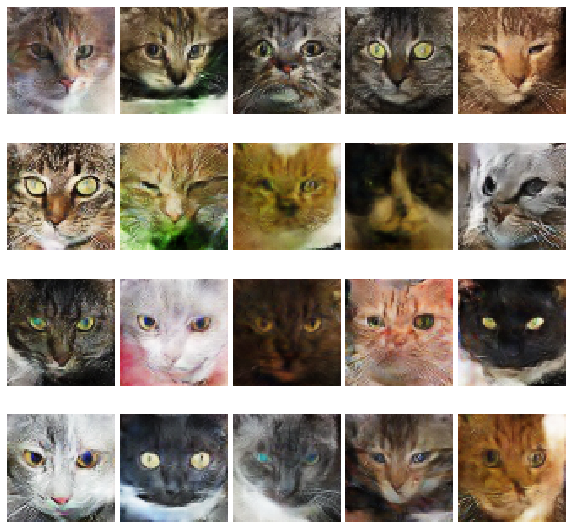

In [7]:
reproduce_cat_samples(4,5,False)

In [7]:
display(*interaction_cat())

Text(value='Select options and click "Run Interact" button to reproduce cat samples', disabled=True, layout=La…

interactive(children=(BoundedIntText(value=4, description='Rows:', max=20, min=1), BoundedIntText(value=5, des…

### Difficulties Encountered

Batch sizes used for training were not stated in the paper which forced us to assume them. We used a batch size of 64 for experiments 5.1 and 5.2 and 32 for the experiment in Appendix F. <br>

An issue with FID scores: 

    Our paper required that we evaluate our models using FID scores. We needed a pretrained InceptionV3 model to calculate the FID scores,
    however, in order to reproduce the results listed in the paper, we would need the same InceptionV3 model as the one used in the paper. 
    Otherwise we would have some differences in weights which would cause differences in FID scores. After some research, we realized that 
    the most mainstream InceptionV3 model for FID score calculation is a TensorFlow implementation which accompanied the original FID paper
    "GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium" 
    (this implementation can be found here: https://github.com/bioinf-jku/TTUR).

    The only PyTorch implementation with wide use seems to be one due to mseitzer which can be found here: 
    https://github.com/mseitzer/pytorch-fid. The issue with this implementation is that, the author has provided the following disclaoimer in
    the readme file: 
     "Note that the official implementation gives slightly different scores. If you report FID scores in your paper, and you want 
    them to be exactly comparable to FID scores reported in other papers, you should use the official Tensorflow implementation."
 
    As seen here and in virtually any other resource available on FID scores, the recommended course of action is to use the oficial implementation
    (or the preloaded InceptionV3 model from the official implementation). However, since the official implementation is in TensorFlow, and 
    since we're expected to implement our metrics ourselves within the scope of this course, we decided to use our own implementation 
    of the FID score calculator. 

    The InceptionV3 model in our implementation is preloaded from torchvision.models with its last layer removed to output activations. We should
    note that our results did not stray too far from those reported in the paper though we do report some differences and partly attribute them
    to the differences in InceptionV3 weights between the two papers. 

    As a clarification, our implementation of the FID scoring algorithm follows the methods explored in the original FID paper but it's
    implementation is completely our work.
<br>

Gradient penalty coefficient parameter was not stated in the paper. We used the WGAN-GP default 10.<br>
<br>
